In [9]:
import pysiclib as psl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#open test and train datasets
train_data = None
with open("mnist_train_5000.csv", "r") as f:
	train_data = f.readlines()

test_data = None
with open("mnist_test_2000.csv", "r") as f:
	test_data = f.readlines()


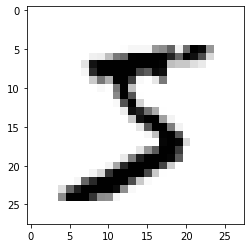

In [2]:
#quick look at what the inputs look like
demo_value = train_data[0].split(',')
img_arr = np.asfarray(demo_value[1:]).reshape((28,28))
plt.imshow(img_arr, cmap='Greys', interpolation='None')

In [5]:

#net params
input_nodes = 784
hidden_nodes = 100
hidden_layers = 1
output_nodes = 10
learning_rate = 0.1
#intialize pysiclib neural net implementation using random weights
pysiclib_net = psl.adaptive.ProtoNet(
	input_nodes, hidden_nodes, hidden_layers, output_nodes, learning_rate)
#intialize numpy neural net implementation using the same weights from pysiclib
numpy_net = psl.adaptive.ProtoNet_Numpy(
	input_nodes, hidden_nodes, hidden_layers, output_nodes, learning_rate, pysiclib_net)

In [6]:
#training loop
num_train_epochs = len(train_data)
for record in train_data[:num_train_epochs]:
	all_values = record.split(',')

	scaled_input_raw = (np.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
	scaled_input = psl.linalg.Tensor(scaled_input_raw).transpose()

	scaled_target_raw = np.zeros(output_nodes) + 0.01
	scaled_target_raw[int(all_values[0])] = 0.99
	scaled_target = psl.linalg.Tensor(scaled_target_raw).transpose()

	pysiclib_net.run_epoch(scaled_input, scaled_target)
	numpy_net.run_epoch(scaled_input_raw, scaled_target_raw)


In [11]:
#test loop
num_test_epochs = len(test_data)
score = []
nscore = []
for record in test_data[:num_test_epochs]:
	all_values = record.split(',')

	scaled_input_raw = (np.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
	scaled_input = psl.linalg.Tensor(scaled_input_raw).transpose()

	correct_label = int(all_values[0])

	query_res = pysiclib_net.query_net(scaled_input)
	numpy_query = numpy_net.query_net(scaled_input_raw)
	label = np.argmax(query_res.to_numpy())
	numpy_label = np.argmax(numpy_query)

	if label == correct_label:
		score.append(1)
	else:
		score.append(0)

	if numpy_label == correct_label:
		nscore.append(1)
	else:
		nscore.append(0)


In [18]:
#calulate performance
correct_perc = sum(score) / len(score) * 100
np_correct_perc = sum(nscore) / len(nscore) * 100

print("pysiclib net correct:\n------")
print("{} %".format(round(correct_perc, 2)))
print("numpy net correct:\n------")
print("{} %".format(round(np_correct_perc, 2)))
print("\n")

pysiclib net correct:
------
89.31 %
numpy net correct:
------
89.31 %


